In [1]:
#librerias a usar
import random
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [2]:
SIZE=100#arreglo de 100x100
STEPS=10000#10000 pasos
H=np.linspace(-15,15,SIZE)
T=np.array([0.1,10,30])

In [3]:
def pbc(i):#condiciones de frontera periodicas
    if i+1> SIZE-1:
        return 0
    elif i-1<0:
        return SIZE-1
    else:
        return i

In [4]:
def energy(spin, i, j, J, H):#energia
    return -J*spin[i,j]*(spin[pbc(i-1),j] + spin[pbc(i+1),j] + spin[i,pbc(j-1)] + spin[i,pbc(j+1)]) - spin[i,j]*H

In [5]:
def build_system_I():#creacion del arreglo aleatorio
    spin = np.random.randint(0,2,(SIZE,SIZE))
    spin[spin == 0] = -1
    return spin

In [6]:
def main_I(T, J, H):#algoritmo de metropolis para spin 1/2
    spin = build_system_I()

    for step,x in enumerate(range(STEPS)):
        j = np.random.randint(0,SIZE)
        i = np.random.randint(0,SIZE)

        Delta_E = -2*energy(spin, i, j, J, H)
    
        if Delta_E <=0:
            spin[i,j] *= -1
        elif np.exp(-1/T*Delta_E) >= np.random.rand():
            spin[i,j] *= -1

    return np.sum(spin)/SIZE**2

In [7]:
def run(T,J,H): #calculo de la magnetizacion para diferentes temperaturas
    M_I1=[]
    M_I2=[]
    M_I3=[]
    

    for i in range(len(H)):
        M_I1.append(main_I(T[0], J, H[i]))
        M_I2.append(main_I(T[1], J, H[i]))
        M_I3.append(main_I(T[2], J, H[i]))
        
    return np.array(M_I1),np.array(M_I2),np.array(M_I3)

In [8]:
Ising=run(T,0,H)#Ising

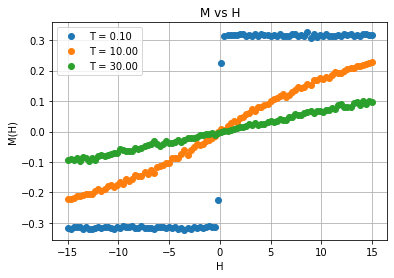

In [9]:
plt.plot(H,Ising[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H,Ising[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H,Ising[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("M vs H")
plt.xlabel("H")
plt.ylabel("M(H)")
plt.legend()
plt.grid()
plt.show()

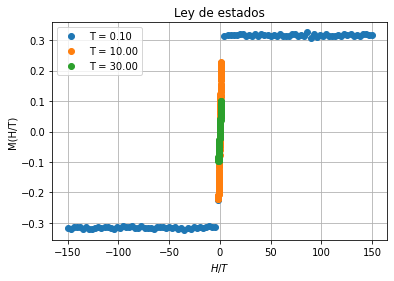

In [10]:
plt.plot(H/T[0],Ising[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H/T[1],Ising[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H/T[1],Ising[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("Ley de estados")
plt.xlabel("$H/T$")
plt.ylabel("M(H/T)")
plt.legend()
plt.grid()
plt.savefig("Ley_estados_I.jpg")
plt.show()

In [11]:
def build_system_Heisenberg_cuantico():#creacion del arreglo para s=3/2
    spin = np.random.randint(0,4,(SIZE,SIZE))
    spin[spin == 0] = -1
    spin[spin == 2] = -3
    return spin

In [12]:
def main_Heisenberg_cuantico(T, J, H):#metropolis para s=3/2
    
    spin = build_system_Heisenberg_cuantico()
      
    for step,x in enumerate(range(STEPS)):
        j = np.random.randint(0,SIZE)
        i = np.random.randint(0,SIZE)

        E_o = energy(spin, i, j, J, H)

        estados=[3,1,-3,-1]
        Spin = spin
        W = []

        for l in range(len(estados)):
                
            Spin[i,j] = estados[l]
            E_f = energy(Spin,i,j,J,H)
            Delta_E = E_f-E_o
            W.append(np.exp(-Delta_E/T))

        k=np.random.rand()*(np.sum(W))

        if k<W[0]:
            spin[i,j] = estados[0]
        elif k<(W[0]+W[1]):
            spin[i,j] = estados[1]
        elif k<(W[0]+W[1]+W[2]):
            spin[i,j] = estados[2]
        else:
            spin[i,j] = estados[3]

    return np.sum(spin)/SIZE**2

In [13]:
def run_Heisenberg_cuantico(T,J,H):#magnetizacion para s=3/2

    M_I1=[]
    M_I2=[]
    M_I3=[]
    

    for i in range(len(H)):
        M_I1.append(main_Heisenberg_cuantico(T[0],J,H[i]))
        M_I2.append(main_Heisenberg_cuantico(T[1],J,H[i]))
        M_I3.append(main_Heisenberg_cuantico(T[2],J,H[i]))
        
    return np.array(M_I1),np.array(M_I2),np.array(M_I3)

In [14]:
Heisenberg_cuantico=run_Heisenberg_cuantico(T,0,H)#heisenber cuantico

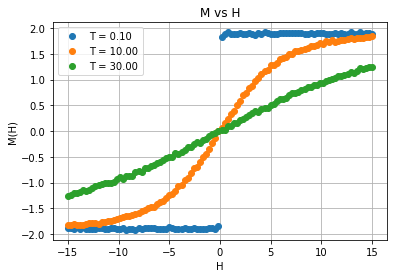

In [15]:
plt.plot(H,Heisenberg_cuantico[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H,Heisenberg_cuantico[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H,Heisenberg_cuantico[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("M vs H")
plt.xlabel("H")
plt.ylabel("M(H)")
plt.legend()
plt.grid()
plt.show()

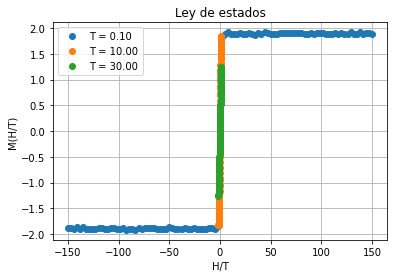

In [16]:
plt.plot(H/T[0],Heisenberg_cuantico[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H/T[1],Heisenberg_cuantico[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H/T[1],Heisenberg_cuantico[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("Ley de estados")
plt.xlabel("H/T")
plt.ylabel("M(H/T)")
plt.legend()
plt.grid()
plt.savefig("Ley_estados_Heisenberg_cuantico.jpg")
plt.show()

In [17]:
#distribucion empleada para el acaso continuo(CLASICO)

def distribucion(T,H):
    mn=0 # Lowest value of domain
    mx=np.pi # Highest value of domain
    if H<0:
        bound= np.exp((-H/T))
    else:
        bound= np.exp((H/T))

      # Upper bound of PDF value
    while True: # Do the following until a value is returned
        # Choose an X inside the desired sampling domain.
        x=random.uniform(mn,mx)
            # Choose a Y between 0 and the maximum PDF value.
        y=random.uniform(0,bound)
            # Calculate PDF
        pdf=np.exp((H/T)*np.cos(x))
            # Does (x,y) fall in the PDF?
        if y<pdf:
            # Yes, so return x
            return x
        # No, so loop

In [18]:
def build_system_Heisenberg_clasico():#creacion de un arreglo que apunte a cualquier direccion en z
    spin = np.random.rand(SIZE,SIZE)
    spin[spin>0.5]-=1
    spin[spin<0.5]*=2
    return spin

In [19]:
def main_Heisenberg_clasico(T,J,H):#metropolis para heisenber cuantico
    spin=build_system_Heisenberg_clasico()
    for step, x in enumerate(range(STEPS)):
        j=np.random.randint(0,SIZE)
        i=np.random.randint(0,SIZE)
        s2=np.cos(distribucion(T,H))
        Delta_E=-(s2-spin[i,j])*H
        if Delta_E<=0.0:
            spin[i,j]=s2
        elif np.exp(-1./T*Delta_E)>=np.random.rand():
            spin[i,j]=s2
    
    return np.sum(spin)/SIZE**2


In [20]:
def run_Heisenberg_clasico(T,J,H):#magnetizacion para heisenberg clasico
    M_I1=[]
    M_I2=[]
    M_I3=[]
    

    for i in range(len(H)):
        M_I1.append(main_Heisenberg_clasico(T[0],J,H[i]))
        M_I2.append(main_Heisenberg_clasico(T[1],J,H[i]))
        M_I3.append(main_Heisenberg_clasico(T[2],J,H[i]))
        
    return np.array(M_I1),np.array(M_I2),np.array(M_I3)

In [21]:
Heisenberg_clasico=run_Heisenberg_clasico(T,0,H)#

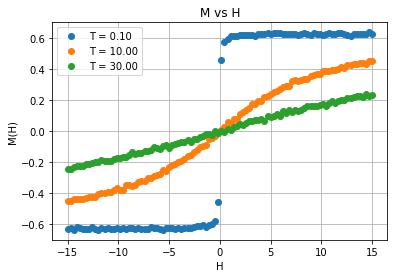

In [22]:
plt.plot(H,Heisenberg_clasico[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H,Heisenberg_clasico[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H,Heisenberg_clasico[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("M vs H")
plt.xlabel("H")
plt.ylabel("M(H)")
plt.legend()
plt.grid()
plt.show()

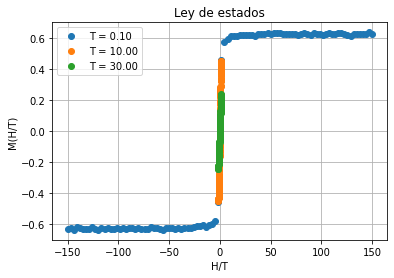

In [23]:
plt.plot(H/T[0],Heisenberg_clasico[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H/T[1],Heisenberg_clasico[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H/T[1],Heisenberg_clasico[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("Ley de estados")
plt.xlabel("H/T")
plt.ylabel("M(H/T)")
plt.legend()
plt.grid()
plt.savefig("Ley_estados_Heisenberg_clasico.jpg")
plt.show()

In [24]:
#Funciones que solucionan los modelos 
def Ising_ajust(H,a,b):
    return a*np.tanh(b*H)

In [25]:
def Brillouin(H,a,b,c):
    return a*(b*(np.cosh(b*c*H)/np.sinh(b*c*H)) - 0.5*(np.cosh(c*H*0.5)/np.sinh(c*H*0.5)) )

In [26]:
def Langevin(H,a,b):
    return a*(1/np.tanh(b*H) - 1/(b*H))
#Final de las funcione

In [27]:
#AJUSTES
popt_Ising1, pcov_Ising1 = curve_fit(Ising_ajust,H,Ising[0])
popt_Ising2, pcov_Ising2 = curve_fit(Ising_ajust,H,Ising[1])
popt_Ising3, pcov_Ising3 = curve_fit(Ising_ajust,H,Ising[2])

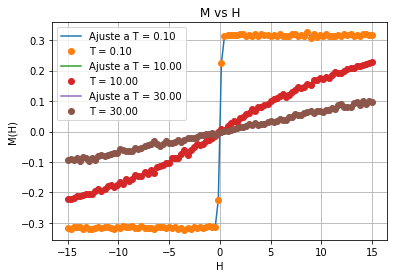

In [28]:
plt.plot(H,Ising_ajust(H,*popt_Ising1),label = ("Ajuste a T = %3.2f"%T[0]))
plt.plot(H,Ising[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H,Ising_ajust(H,*popt_Ising2),label = ("Ajuste a T = %3.2f"%T[1]))
plt.plot(H,Ising[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H,Ising_ajust(H,*popt_Ising3),label = ("Ajuste a T = %3.2f"%T[2]))
plt.plot(H,Ising[2],"o",label = ("T = %3.2f"%T[2]))                           
plt.title("M vs H")
plt.xlabel("H")
plt.ylabel("M(H)")
plt.legend()
plt.grid()
plt.savefig("MI.jpg")
plt.show()

In [29]:
popt_cuantico1, pcov_cuantico1 = curve_fit(Brillouin, H, Heisenberg_cuantico[0])
popt_cuantico2, pcov_cuantico2 = curve_fit(Brillouin, H, Heisenberg_cuantico[1])
popt_cuantico3, pcov_cuantico3 = curve_fit(Brillouin, H, Heisenberg_cuantico[2],maxfev =8000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in cosh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


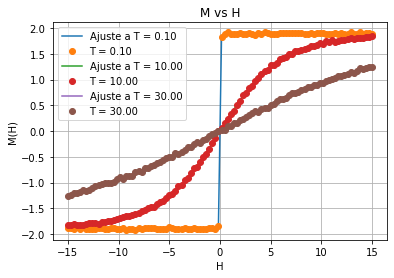

In [30]:
plt.plot(H,Brillouin(H,*popt_cuantico1),label = ("Ajuste a T = %3.2f"%T[0]))
plt.plot(H,Heisenberg_cuantico[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H,Brillouin(H,*popt_cuantico2),label = ("Ajuste a T = %3.2f"%T[1]))
plt.plot(H,Heisenberg_cuantico[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H,Brillouin(H,*popt_cuantico3),label = ("Ajuste a T = %3.2f"%T[2]))
plt.plot(H,Heisenberg_cuantico[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("M vs H")
plt.xlabel("H")
plt.ylabel("M(H)")
plt.legend()
plt.grid()
plt.savefig("Heisenberg_cuantico.jpg")
plt.show()

In [31]:
popt_clasico1, pcov_clasico1 = curve_fit(Langevin, H, Heisenberg_clasico[0])
popt_clasico2, pcov_clasico2 = curve_fit(Langevin, H, Heisenberg_clasico[1])
popt_clasico3, pcov_clasico3 = curve_fit(Langevin, H, Heisenberg_clasico[2])

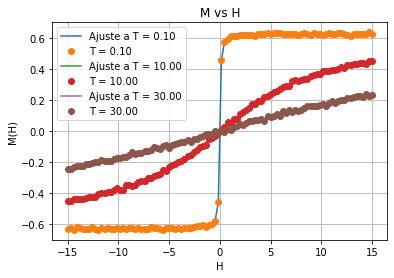

In [32]:
plt.plot(H,Langevin(H,*popt_clasico1),label = ("Ajuste a T = %3.2f"%T[0]))
plt.plot(H,Heisenberg_clasico[0],"o",label = ("T = %3.2f"%T[0]))
plt.plot(H,Langevin(H,*popt_clasico2),label = ("Ajuste a T = %3.2f"%T[1]))
plt.plot(H,Heisenberg_clasico[1],"o",label = ("T = %3.2f"%T[1]))
plt.plot(H,Langevin(H,*popt_clasico3),label = ("Ajuste a T = %3.2f"%T[2]))
plt.plot(H,Heisenberg_clasico[2],"o",label = ("T = %3.2f"%T[2]))
plt.title("M vs H")
plt.xlabel("H")
plt.ylabel("M(H)")
plt.legend()
plt.grid()
plt.savefig("Heisenberg_clasico.jpg")
plt.show()
#FINAL DE LOS AJUSTES

In [33]:
def main_I_ferro(T, J, H,Spin):#creacion del arreglo ferromagnetico
    
    if len(Spin) == 0:
        
        spin = build_system_I()
    
    else:
        spin = Spin.copy()#se crea una copia porque al igualar se pierde informacion necesaria
        
    for step,x in enumerate(range(STEPS)):
        j = np.random.randint(0,SIZE)
        i = np.random.randint(0,SIZE)

        Delta_E = -2*energy(spin, i, j, J, H)
    
        if Delta_E <=0:
            spin[i,j] *= -1
        elif np.exp(-1/T*Delta_E) >= np.random.rand():
            spin[i,j] *= -1

    return spin

In [34]:
def run_ferro(T,J,H):#Magnetizacion de un ferromagnetico
    
    M_I1=[]
    
    M_I1_regreso=[]

    for i in range(len(H)):

        spin1=[]
        spin1=main_I_ferro(T, J, H[i],spin1)

        M_I1.append(np.sum(main_I_ferro(T, J, H[i],spin1))/SIZE**2)
            
    for i in range(len(H)):
        
        M_I1_regreso.append(np.sum(main_I_ferro(T, J, H[i],spin1))/SIZE**2)      

        
    return np.array(M_I1),np.array(M_I1_regreso)

In [63]:
STEPS=100000
J=15
T=3
H2=np.linspace(-50,50,100)
Ising_ferro=run_ferro(T,J,H2)#FERROMAGNETICO

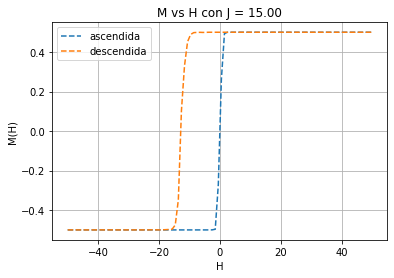

In [64]:
plt.plot(H2,Ising_ferro[0],"--",label = "ascendida")
plt.plot(H2,Ising_ferro[1],"--",label = "descendida")
plt.title("M vs H con J = %2.2f"%J)
plt.xlabel("H")
plt.ylabel("M(H)")
plt.legend()
plt.grid()
plt.savefig("Ferro.jpg")
plt.show()

In [65]:
def run_ferro_fase(T,J,H): 
    
    M_I1=[]

    for i in range(len(T)):

        spin1=np.ones((SIZE,SIZE))#un ferromagnetico puro tiene todos los espines hacia abajo
        spin1=main_I_ferro(T[i], J, H,spin1)

        M_I1.append(np.sum(main_I_ferro(T[i], J, H,spin1))/SIZE**2)
            
    return np.array(M_I1)

In [66]:
J=1#ferromagnetico J>1
H=0#sin campo externo
T2=np.linspace(.1,5,100)
Ising_ferro_fase=run_ferro_fase(T2,J,H)

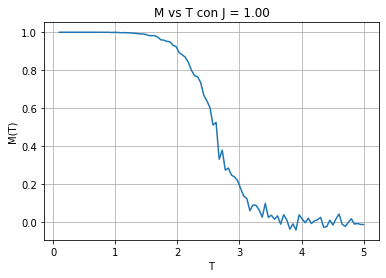

In [67]:
plt.plot(T2,Ising_ferro_fase)
plt.title("M vs T con J = %2.2f"%J)
plt.xlabel("T")
plt.ylabel("M(T)")
plt.grid()
plt.savefig("Ferro_fase.jpg")
plt.show()

In [68]:
def snap(T,J,H): #sigual al anterior pero devuelve el arreglo en lugar de la magnetizacion
        
    spin1=np.ones((SIZE,SIZE))
    spin1=main_I_ferro(T, J, H,spin1)

    return spin1

In [69]:
t=[0.1,1,2,3,4,5,]

s=[]

for i in range(len(t)):
    
    s.append(snap(t[i],J,H))


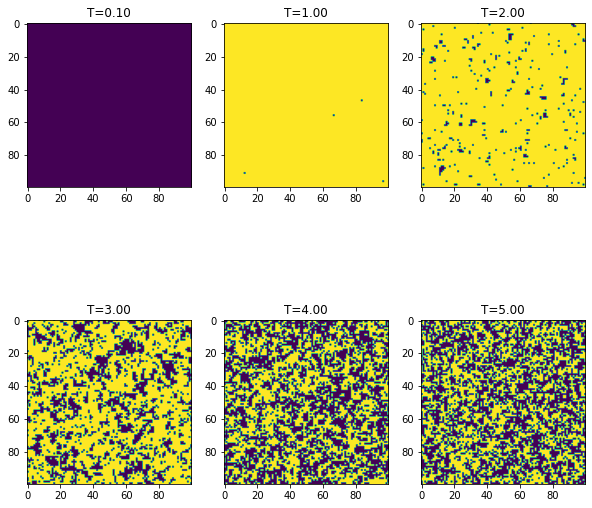

In [70]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 3, 1)
plt.imshow(s[0])
plt.title("T=%2.2f"%t[0])

fig.add_subplot(2, 3, 2)
plt.imshow(s[1])
plt.title("T=%2.2f"%t[1])
          
fig.add_subplot(2, 3, 3)
plt.imshow(s[2])
plt.title("T=%2.2f"%t[2])

fig.add_subplot(2, 3, 4)
plt.imshow(s[3])
plt.title("T=%2.2f"%t[3])
          
fig.add_subplot(2, 3, 5)
plt.imshow(s[4])
plt.title("T=%2.2f"%t[4])
          
fig.add_subplot(2, 3, 6)
plt.imshow(s[5])
plt.title("T=%2.2f"%t[5])

plt.savefig("snapshot.jpg")

In [75]:
def ener(spin,H,J):
    
    E=0
        
    for i in range(SIZE):
        for j in range(SIZE):
            E+=energy(spin,i,j,J,H)
    
    return E

In [71]:
def main_CV(T,J,H):  
    
    Cv = []
    
    for k in range(len(T)):
        
        spin = np.ones((SIZE,SIZE))
        E_i = 0#E inicial
        E2 = 0#E^2
        E = 0#U

        for steps, x in enumerate(range(STEPS)):
            if x == STEPS*0.8:#punto donde se espera que la energia fluctue alrededor de un punto fijo
                E_i = ener(spin,J,H)
            j = np.random.randint(0,SIZE)
            i = np.random.randint(0,SIZE)
            Delta_E = -2.*energy(spin, i, j,J,H)
            if Delta_E <=0.:
                spin[i,j] *= -1
                if x>STEPS/2:
                    E_i += Delta_E 
                    E += E_i/STEPS 
                    E2 += (E_i**2)/STEPS
          
            elif np.exp(-Delta_E/T[k]) >= np.random.rand():
                spin[i,j] *= -1
                if x>STEPS/2:
                    E_i += Delta_E 
                    E += E_i/STEPS
                    E2 += (E_i**2)/STEPS
        Cv.append((E2-E**2)/((SIZE*T[k]))**2)

    return np.array(Cv)

In [72]:
CV= main_CV(T2,J,H)

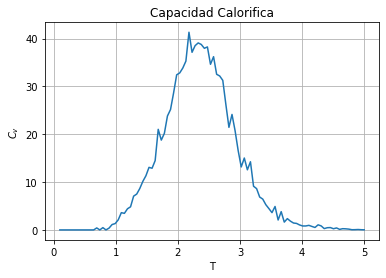

In [73]:
plt.plot(T2,CV)
plt.title("Capacidad Calorifica")
plt.xlabel("T")
plt.ylabel("$C_v$")
plt.grid()
plt.savefig("CV.jpg")
plt.show()

In [74]:
T_C=T2[np.where(CV == np.max(CV))]#Maximo pico de C_v lo que da T_C

In [78]:
print (T_C)
print ((abs(T_C-2.269))/2.269)

[2.17878788]
[0.03975854]


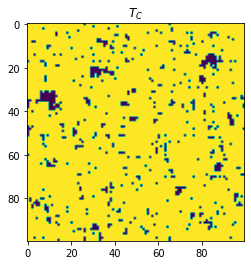

In [81]:
fig = plt.figure(frameon=False)
plt.imshow(snap(T_C,J,H))
plt.title("$T_C$")

plt.savefig("snapshot_TC.jpg")

EL algoritmo empleado es similar al usado anteriormente, las modificaciones se explican en el articulo

In [83]:
def energy_triangula(spin, i, j, J, H):
    return -J*spin[i,j]*(spin[pbc(i-2),j] + spin[pbc(i+2),j] + spin[pbc(i+1),pbc(j-1)] + spin[pbc(i+1),pbc(j+1)] + spin[pbc(i-1),pbc(j-1)] + spin[pbc(i-1),pbc(j+1)]) - spin[i,j]*H

In [109]:
def build_system_tri():
    spin = -np.ones((SIZE,SIZE))

    for i in range(SIZE):
          for j in range(SIZE):
            if i%2==0 and j%2!=0:
                spin[i,j]=0
            elif i%2!=0 and j%2==0:
                spin[i,j]=0

    for i in range(SIZE):
          for j in range(SIZE):

            if j%2==0 and i%4!=0:
                spin[i,j]*=-1
            elif j%2!=0 and (i+1)%4!=0:
                spin[i,j]*=-1

    return spin*0.5

In [110]:
def main_I_antiferro_tri(T, J, H,Spin):
    
    if len(Spin) == 0:
        
        spin = build_system_tri()
    
    else:
        spin = Spin.copy()
        
    for step,x in enumerate(range(STEPS)):
        j = np.random.randint(0,SIZE)
        i = np.random.randint(0,SIZE)
        while(spin[i,j]==0):
            j = np.random.randint(0,SIZE)
            i = np.random.randint(0,SIZE)
        
        Delta_E = -2*energy(spin, i, j, J, H)
    
        if Delta_E <=0:
            spin[i,j] *= -1
        elif np.exp(-1/T*Delta_E) >= np.random.rand():
            spin[i,j] *= -1

    return spin

In [114]:
def run_antiferro(T,J,H): 
    
    M_I1=[]

    for i in range(len(T)):

        spin1=build_system_tri()
        spin1=main_I_antiferro_tri(T[i], J, H,spin1)

        M_I1.append(np.sum(main_I_antiferro_tri(T[i], J, H,spin1))/SIZE**2)
            
    return np.array(M_I1)

In [116]:
anti=run_antiferro(T2,-J,H)

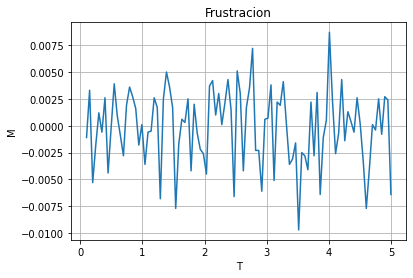

In [117]:
plt.plot(T2,anti)
plt.title("Frustracion")
plt.xlabel("T")
plt.ylabel("M")
plt.grid()
plt.savefig("anti.jpg")
plt.show()